In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import string
import numpy as np
import pandas as pd
from numpy import array
from pickle import load

from PIL import Image
import pickle
from collections import Counter
import matplotlib.pyplot as plt

import sys, time, os, warnings
warnings.filterwarnings("ignore")
import re

import keras
import tensorflow as tf
from tqdm import tqdm
from nltk.translate.bleu_score import sentence_bleu

import os
import pickle
import numpy as np  
import pandas as pd  

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Embedding, add

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plte

import tensorflow as tf

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# n-gram individual BLEU
from nltk.translate.bleu_score import sentence_bleu
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle

In [ ]:
image_path = "/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/"
captions_dir = "/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/"
feature_dir = '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset'
pngs = os.listdir(image_path)

print("Total Images in Dataset = {}".format(len(pngs)))

Total Images in Dataset = 6814


In [ ]:
images_path = '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/'
from glob import glob
images = glob(images_path+'*.jpg')
len(images)
for i in images:
 print(i)
print("The total images present in the dataset: {}".format(len(images)))

/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501001.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501002.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501003.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501004.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501005.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1502001.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1502002.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1502003.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1502004.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipp

In [ ]:
images[:5]

['/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501001.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501002.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501003.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501004.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501005.jpg']

In [ ]:
!pip install tensorflow keras pillow numpy tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
BASE_DIR = '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset'
WORKING_DIR = '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/'

In [ ]:
#LOAD FEATURES
with open(os.path.join(WORKING_DIR, '152features.npy'),'rb') as f:
  features = pickle.load(f)

In [ ]:
len(features)

6814

In [ ]:
with open(os.path.join(captions_dir, 'Copy of Caption.txt'),'r') as f:
  next(f)
  captions_doc = f.read()

#CHECK
captions_doc

'\n\n1510002  মধুর ক্যান্টিনের বারান্দায় কয়েকজন ছাত্র বসে গল্প করছে।\n\n\n1510003 মধুর ক্যান্টিনের সামনে ছাত্ররা জড়ো হয়েছে।\n\n\n1510004 অপরাজেয় বাংলার পাদদেশে অনেক মানুষ বসে আছে।\n\n\n1510005 ঢাকা বিশ্ববিদ্যালয় লাইব্রেরি থেকে একজন হুডি পড়া ছেলে বের হচ্ছে আর একজন নেভি ব্লু রঙের হুডি পড়া ছাত্র ভিতরে ঢুকছে।\n\n\n1520001 একটি মেয়ে হলুদ রঙের একটা মুখোশ নকশা করছে।\n\n\n1520002 দুইজন মেয়ে শাড়ি আর মাথায় ফুলের মুকুট পড়েছে।\n1520003  সবাই লাল সাদা জামা পড়ে হাতে ফেস্টুন নিয়ে সামনে যাচ্ছে।\n\n\n1520004  একটা মেয়ে লাল শাড়ি আর মাথায় ফুল পড়েছে এবং তার গালে শুভ নববর্ষ লেখা।\n\n\n1520005 কয়েকটা মেয়ে মাথায় ফুলের মুকুট আর লাল শাড়ি পড়ে হাটছে।\n\n\n1502006 দুইজন মহিলা হলুদ ফুলের তিতলি আর মালা পড়ে ছবি গাঁদা ফুল দেখছে।\n\n\n1502007 মাথায় ফুলের মুকুট পড়া একজন মেয়ে দুইটা মেয়ের ছবি তুলে দিচ্ছে।\n\n\n1520008 তিনজন মেয়ে শাড়ি আর ফুলের গয়না পড়ে নৃত্য পরিবেশনা করছে।\n\n\n15030001 চারটা বাচ্চা গল্পের বই দেখছে।\n\n\n1503002 একটা বই এর স্টলের সামনে অনেক মানুষ বই দেখছে।\n\n\n1503003 সাদা জামা পড়া একটি মেয়ে বই এর স্টলে 

In [ ]:
mapping = {}
# PROCESS LINE
for line in tqdm(captions_doc.split('\n')):
  #SPLIT THE LINE BY COMMA
  tokens = line.split(',')
  if len(line) <12:
    continue
  image_id, caption = tokens[0], tokens[1:]
  #REMOVE EXTENSION FROM IMAGE ID
  image_id = image_id.split('.')[0]
  #CONVERT CAPTION LIST TO STRING
  caption = " ".join(caption)
  #CREATE LIST IF NEED
  if image_id not in mapping:
    mapping[image_id] = []
  mapping[image_id].append(caption)

100%|██████████| 117/117 [00:00<00:00, 110178.17it/s]


In [ ]:
def clean(mapping):
  for key, captions in mapping.items():
    for i in range(len(captions)):
      caption = captions[i] #TAKE ONE CAPTION AT A TIME
      #PREPROCESSING STEPS
      caption = caption.replace('\s+',' ') #DELETE ADDITIONAL SPACES
      #ADD START AND TAGS TO THE CAPTIONS
      #caption = '<start> ' + caption + ' <end>' #HELP'S TO START AND STOP PREDICITON, END TAG HELPS TO STOP
      caption = '<start> ' + " ".join(word for word in caption.split() if len(word)) + ' <end>' #remove small first word such as 'a'
      captions[i] = caption

In [ ]:
clean(mapping)

In [ ]:
all_captions = []
for key in mapping:
  for caption in mapping[key]:
    all_captions.append(caption)

#check
print(len(features))
print(len(all_captions))
all_captions[:10]

6814
39


['<start>  <end>',
 '<start>  <end>',
 '<start>  <end>',
 '<start>  <end>',
 '<start>  <end>',
 '<start>  <end>',
 '<start>  <end>',
 '<start>  <end>',
 '<start>  <end>',
 '<start>  <end>']

In [ ]:
all_img_name_vector = []

for image_id in mapping:
  for key in mapping[image_id]:
    image = image_path + image_id + '.png'
    all_img_name_vector.append(image)

all_img_name_vector[:10]

['/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1510002  মধুর ক্যান্টিনের বারান্দায় কয়েকজন ছাত্র বসে গল্প করছে।.png',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1510003 মধুর ক্যান্টিনের সামনে ছাত্ররা জড়ো হয়েছে।.png',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1510004 অপরাজেয় বাংলার পাদদেশে অনেক মানুষ বসে আছে।.png',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1510005 ঢাকা বিশ্ববিদ্যালয় লাইব্রেরি থেকে একজন হুডি পড়া ছেলে বের হচ্ছে আর একজন নেভি ব্লু রঙের হুডি পড়া ছাত্র ভিতরে ঢুকছে।.png',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1520001 একটি মেয়ে হলুদ রঙের একটা মুখোশ নকশা করছে।.png',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1520002 দুইজন মেয়ে শাড়ি আর মাথায় ফুলের মুকুট পড়েছে।.png',
 '/co

In [ ]:
print(f"len(all_img_name_vector) : {len(all_img_name_vector)}")
print(f"len(all_captions) : {len(all_captions)}")

len(all_img_name_vector) : 39
len(all_captions) : 39


In [ ]:
# Shuffle captions and image_names together
# Set a random state
train_captions, img_name_vector = shuffle(all_captions,
                                          all_img_name_vector,
                                          random_state=1)

# Select the first 16000 captions from the shuffled set
num_examples = 18000
train_captions = train_captions[:num_examples]
img_name_vector = img_name_vector[:num_examples]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index)+1

vocab_size #CHECK

9

In [ ]:
len(train_captions), len(all_captions)

(39, 39)

In [ ]:
def load_image(image_path):
   img = tf.io.read_file(image_path)
   img = tf.image.decode_jpeg(img, channels=3)
   img = tf.image.resize(img, (224, 224))
   img = preprocess_input(img)
   return img, image_path

image_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

image_features_extract_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
# Get unique images
encode_train = sorted(set(img_name_vector))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

In [ ]:
for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

In [ ]:
image_path_to_caption = '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Copy of Caption.txt/'
with open(os.path.join(BASE_DIR, 'Copy of Caption.txt'),'r') as f:
  next(f)
  captions_doc = f.read()

In [ ]:
captions_doc

'\n\n1510002  মধুর ক্যান্টিনের বারান্দায় কয়েকজন ছাত্র বসে গল্প করছে।\n\n\n1510003 মধুর ক্যান্টিনের সামনে ছাত্ররা জড়ো হয়েছে।\n\n\n1510004 অপরাজেয় বাংলার পাদদেশে অনেক মানুষ বসে আছে।\n\n\n1510005 ঢাকা বিশ্ববিদ্যালয় লাইব্রেরি থেকে একজন হুডি পড়া ছেলে বের হচ্ছে আর একজন নেভি ব্লু রঙের হুডি পড়া ছাত্র ভিতরে ঢুকছে।\n\n\n1520001 একটি মেয়ে হলুদ রঙের একটা মুখোশ নকশা করছে।\n\n\n1520002 দুইজন মেয়ে শাড়ি আর মাথায় ফুলের মুকুট পড়েছে।\n1520003  সবাই লাল সাদা জামা পড়ে হাতে ফেস্টুন নিয়ে সামনে যাচ্ছে।\n\n\n1520004  একটা মেয়ে লাল শাড়ি আর মাথায় ফুল পড়েছে এবং তার গালে শুভ নববর্ষ লেখা।\n\n\n1520005 কয়েকটা মেয়ে মাথায় ফুলের মুকুট আর লাল শাড়ি পড়ে হাটছে।\n\n\n1502006 দুইজন মহিলা হলুদ ফুলের তিতলি আর মালা পড়ে ছবি গাঁদা ফুল দেখছে।\n\n\n1502007 মাথায় ফুলের মুকুট পড়া একজন মেয়ে দুইটা মেয়ের ছবি তুলে দিচ্ছে।\n\n\n1520008 তিনজন মেয়ে শাড়ি আর ফুলের গয়না পড়ে নৃত্য পরিবেশনা করছে।\n\n\n15030001 চারটা বাচ্চা গল্পের বই দেখছে।\n\n\n1503002 একটা বই এর স্টলের সামনে অনেক মানুষ বই দেখছে।\n\n\n1503003 সাদা জামা পড়া একটি মেয়ে বই এর স্টলে 

In [ ]:
image_model = tf.keras.applications.ResNet50(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-5].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)
 
image_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_5[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

Feature Extract from Resnet 50

In [ ]:
# extract features from image
features = {}
directory = os.path.join(BASE_DIR, 'IMAGE')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = image_model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/6814 [00:00<?, ?it/s]

In [ ]:
#STORE FEATURES IN PICKLE
pickle.dump(features, open(os.path.join(WORKING_DIR, '50features.npy'),'wb'))

In [ ]:
len(features) 

6814

In [ ]:

image_path_to_caption = '//content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/1-10000.txt/'

In [ ]:
with open(os.path.join(BASE_DIR, 'BI Captions.txt'),'r') as f:
  next(f)
  captions_doc = f.read()

In [ ]:
captions_doc

"2.jpg সমুদ্রে একটি সাদা জাহাজ চলছে\n3.jpg সুউচ্চ সবুজ পাহাড় আর মেঘলা আকাশ \n4.jpg আকাশে সাদা পাখি উড়ছে   \n5.jpg সারি সারি কাঠের বাক্স\n6.jpg জানালার গ্লাসে বৈদ্যুতিক খাম্বার প্রতিফলন দেখা যাচ্ছে \n7.jpg দুই কাঁধে রঙিন বেতের ঝুড়ি নিয়ে যাচ্ছে একজন লোক\n8.jpg সাদাকালো অনেকগুলো কুকুর একসারিতে বসে আছে\n9.jpg কমলা, টিয়া রংয়ের সারি সারি জুতা সাজানো\n10.jpg সমুদ্রের পাড়ে পরে আছে মরচে ধরা শিকল\n11.jpg অনেকগুলো স্ক্রু জড়ে করা\n12.jpg অটো রিকশা নিয়ে দাঁড়িয়ে আছে রিকশাচালকটি\n13.jpg অনেকগুলো তোয়ালে ভাজ করে স্তুপ করে রাখা আছে\n14.jpg ধুসর দোকানগুলোর মাঝে লাল রংয়ের একটি টেলিফোন বুথ\n15.jpg পিচঢালা রাস্তার উপর পরে আছে শুকনো পাতা\n16.jpg লেকের মাঝে নৌকায় ছোট মেয়েটি একা বসে আছে\n17.jpg ছোট টিলার পাশে রঙিন কাঠের কিছু ঘর\n18.jpg দিগন্ত বিস্তৃত  সবুজ মাঠ ছুয়ে গেছে নীল আকাশকে\n19.jpg শান্ত সমুদ্র ও রৌদ্রজ্জল নীল আকাশ \n20.jpg একটি খোলা বই ও পেন্সিল \n21.jpg টেবিলের উপর রাখা অগোছালো বইয়ের স্তুপ\n22.jpg পিচঢালা রাস্তার পাশে সবুজ মাঠ\n23.jpg দুই প্রতিযোগির মধ্যে চলছে কার রেসিং \n100.jpg রেস্টুরেন্টে বসে আছে 

In [ ]:
mapping = {}
# PROCESS LINE
for line in tqdm(captions_doc.split('\n')):
  #SPLIT THE LINE BY COMMA
  tokens = line.split(',')
  if len(line) <2:
    continue
  image_id, caption = tokens[0], tokens[1:]
  #REMOVE EXTENSION FROM IMAGE ID
  image_id = image_id.split('.')[0]
  #CONVERT CAPTION LIST TO STRING
  caption = " ".join(caption)
  #CREATE LIST IF NEED
  if image_id not in mapping:
    mapping[image_id] = []
  mapping[image_id].append(caption)

  0%|          | 0/117 [00:00<?, ?it/s]

In [ ]:
#CHECK
len(mapping)

39

In [ ]:
def clean(mapping):
  for key, captions in mapping.items():
    for i in range(len(captions)):
      caption = captions[i] #TAKE ONE CAPTION AT A TIME
      #PREPROCESSING STEPS
      caption = caption.lower() #CONVERT TO LOWER CASE
      caption = caption.replace('\s+',' ') #DELETE ADDITIONAL SPACES
      #ADD START AND TAGS TO THE CAPTIONS
      #caption = '<start> ' + caption + ' <end>' #HELP'S TO START AND STOP PREDICITON, END TAG HELPS TO STOP
      #caption = '<start> ' + " ".join(word for word in caption.split() if len(word) > 1) + ' <end>' #remove small first word such as 'a'
      captions[i] = caption

In [ ]:
clean(mapping)

In [ ]:
all_captions = []
for key in mapping:
  for caption in mapping[key]:
    all_captions.append(caption)

#check
print(len(features))
print(len(all_captions))
all_captions[:10]

6814
39


['', '', '', '', '', '', '', '', '', '']

In [ ]:
all_img_name_vector = []

for image_id in mapping:
  for key in mapping[image_id]:
    image = image_path + image_id + '.jpg'
    all_img_name_vector.append(image)

all_img_name_vector[:10]

['/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/1510002  মধুর ক্যান্টিনের বারান্দায় কয়েকজন ছাত্র বসে গল্প করছে।.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/1510003 মধুর ক্যান্টিনের সামনে ছাত্ররা জড়ো হয়েছে।.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/1510004 অপরাজেয় বাংলার পাদদেশে অনেক মানুষ বসে আছে।.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/1510005 ঢাকা বিশ্ববিদ্যালয় লাইব্রেরি থেকে একজন হুডি পড়া ছেলে বের হচ্ছে আর একজন নেভি ব্লু রঙের হুডি পড়া ছাত্র ভিতরে ঢুকছে।.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/1520001 একটি মেয়ে হলুদ রঙের একটা মুখোশ নকশা করছে।.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/1520002 দুইজন মেয়ে শাড়ি আর মাথায় ফুলের মুকুট পড়েছে।.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm d

In [ ]:
print(f"len(all_img_name_vector) : {len(all_img_name_vector)}")
print(f"len(all_captions) : {len(all_captions)}")

len(all_img_name_vector) : 39
len(all_captions) : 39


In [ ]:
# Shuffle captions and image_names together
# Set a random state
train_captions, img_name_vector = shuffle(all_captions,
                                          all_img_name_vector,
                                          random_state=1)

# Select the first 16000 captions from the shuffled set
num_examples = 18000
train_captions = train_captions[:num_examples]
img_name_vector = img_name_vector[:num_examples]

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModel


bnbert_tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
text =  'দুইটি কৃষ্ণচূড়া গাছের পিছনে ঢাকা বিশ্ববিদ্যালয়ের একটা বাস দেখা যাচ্ছে।\n\n1510002  মধুর ক্যান্টিনের বারান্দায় কয়েকজন ছাত্র বসে গল্প করছে।\n\n1510003 মধুর ক্যান্টিনের সামনে ছাত্ররা জড়ো হয়েছে।\n\n1510004 অপরাজেয় বাংলার পাদদেশে অনেক মানুষ বসে আছে।\n\n1510005 ঢাকা বিশ্ববিদ্যালয় লাইব্রেরি থেকে একজন হুডি পড়া ছেলে বের হচ্ছে আর একজন নেভি ব্লু রঙের হুডি পড়া ছাত্র ভিতরে ঢুকছে।\n\n1520001 একটি মেয়ে হলুদ রঙের একটা মুখোশ নকশা করছে।\n\n1520002 দুইজন মেয়ে শাড়ি আর মাথায় ফুলের মুকুট পড়েছে, পাশে কয়েকটা বাচ্চা ফেস্টুন নিয়ে দাঁড়িয়ে আছে।\n\n1520003  সবাই লাল সাদা জামা পড়ে হাতে ফেস্টুন নিয়ে সামনে যাচ্ছে।\n\n1520004  একটা মেয়ে লাল শাড়ি আর মাথায় ফুল পড়েছে এবং তার গালে শুভ নববর্ষ লেখা।\n\n1520005 কয়েকটা মেয়ে মাথায় ফুলের মুকুট আর লাল শাড়ি পড়ে হাটছে।\n\n1502006 দুইজন মহিলা হলুদ ফুলের তিতলি আর মালা পড়ে ছবি গাঁদা ফুল দেখছে।\n\n1502007 মাথায় ফুলের মুকুট পড়া একজন মেয়ে দুইটা মেয়ের ছবি তুলে দিচ্ছে।\n\n1520008 তিনজন মেয়ে শাড়ি আর ফুলের গয়না পড়ে নৃত্য পরিবেশনা করছে।\n\n15030001 চারটা বাচ্চা গল্পের বই দেখছে।\n\n'


tokens = bnbert_tokenizer.tokenize(captions_doc)

print("Total Tokens", len(tokens))
print(tokens)


Total Tokens 681
['[UNK]', 'মধ', '##র', 'ক', '##যান', '##টিনের', 'বারান', '##দা', '##য', 'ক', '##যে', '##ক', '##জন', 'ছাত', '##র', 'বসে', 'গল', '##প', 'করছে', '।', '[UNK]', 'মধ', '##র', 'ক', '##যান', '##টিনের', 'সামনে', 'ছাত', '##র', '##রা', 'জ', '##ডে', '##া', 'হযেছে', '।', '[UNK]', 'অপরা', '##জে', '##য', 'বাংলার', 'পাদদেশে', 'অনেক', 'মান', '##ষ', 'বসে', 'আছে', '।', '[UNK]', 'ঢাকা', 'বিশ', '##বব', '##িদ', '##যা', '##ল', '##য', 'লাইব', '##রে', '##রি', 'থেকে', 'একজন', 'হ', '##ডি', 'পড', '##া', 'ছেলে', 'বের', 'হ', '##চ', '##ছে', 'আর', 'একজন', 'নেভি', 'বল', 'রঙের', 'হ', '##ডি', 'পড', '##া', 'ছাত', '##র', 'ভিতরে', 'ঢক', '##ছে', '।', '[UNK]', 'একটি', 'মে', '##যে', 'হল', '##দ', 'রঙের', 'একটা', 'মখ', '##ে', '##াশ', 'নকশা', 'করছে', '।', '[UNK]', 'দই', '##জন', 'মে', '##যে', 'শা', '##ডি', 'আর', 'মাথা', '##য', 'ফলের', 'মক', '##ট', 'পড', '##েছে', '।', '[UNK]', 'সবাই', 'লাল', 'সাদা', 'জামা', 'পড', '##ে', 'হাতে', 'ফেস', '##টন', 'নি', '##যে', 'সামনে', 'যা', '##চ', '##ছে', '।', '[UNK]', 'একটা', 'মে', 

In [ ]:
#TOKENIZE TEXT
bnbert_tokenizer = Tokenizer()
bnbert_tokenizer.fit_on_texts(all_captions)
vocab_size = len(bnbert_tokenizer.word_index)+1

vocab_size #CHECK

7

In [ ]:
def create_vocabulary(data):
  vocab = []
  for captions in data.Captions.values:
    vocab.extend(captions.split())
  print("Vocabulary Size : {}".format(len(set(vocab))))
  return vocab

In [ ]:
#GET MAXIMUM LENGTH OF THE CAPTION FOR PADDING THE SEQUENCE AND MODEL
max_length = max(len(caption.split()) for caption in all_captions)

max_length  #check

7

In [ ]:


#GET MAXIMUM LENGTH OF THE CAPTION FOR PADDING THE SEQUENCE AND MODEL
avg_length = sum(len(caption.split()) for caption in all_captions)/max_length

avg_length #check

1.0

In [ ]:

#GET MAXIMUM LENGTH OF THE CAPTION FOR PADDING THE SEQUENCE AND MODEL
total_length =sum(len(caption.split()) for caption in all_captions)

total_length#check

7

In [ ]:
len(train_captions), len(all_captions)

(39, 39)

In [ ]:
# Get unique images
encode_train = sorted(set(img_name_vector))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

#check
print(len(train))
print(len(test))

35
4


In [ ]:
def data_generator(data_keys, mapping, features, bnbert_tokenizer, max_length, vocab_size, batch_size):
  #loop over images
  X1, X2, y = list(), list(), list()
  n = 0
  while 1:
    for key in data_keys:
      n+=1
      caption = mapping[key]
      #process each caption
      for caption in caption:
        #encode the sequence
        seq = bnbert_tokenizer.texts_to_sequences([caption])[0]
        #split the sequence into X,y pairs
        for i in range(1, len(seq)):
          #split into input and output pairs
          in_seq, out_seq = seq[:i],seq[i]
          #pad input sequence
          in_seq = pad_sequences([in_seq], maxlen = max_length)[0]
          #encode output sequence
          out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

          #store sequences
          X1.append(features[key][0])
          X2.append(in_seq)
          y.append(out_seq)
  if n == batch_size:
    X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    yield [X1,X2], y
    X1, X2, y = list(), list(), list()
    n = 0

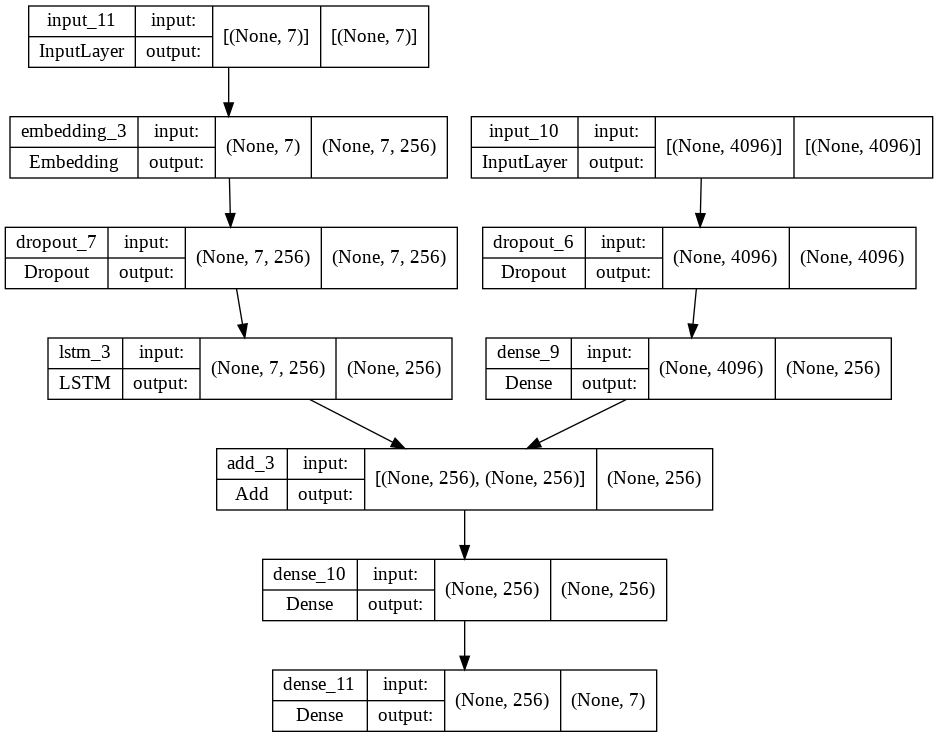

In [ ]:
 # encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='Nadam')

# plot the model
plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 7)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 4096)]       0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 7, 256)       1792        ['input_11[0][0]']               
                                                                                                  
 dropout_6 (Dropout)            (None, 4096)         0           ['input_10[0][0]']               
                                                                                            

In [ ]:
# train the model
epochs = 10
batch_size = 16
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, bnbert_tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

In [ ]:
model.layers[2]
model.layers[2].trainable = False

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 7, 256)       7424        ['input_4[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 4096)         0           ['input_3[0][0]']                
                                                                                            

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="adam")

In [ ]:
epochs = 15
batch_size = 3
steps = len(train_descriptions)//batch_size

NameError: ignored

In [ ]:
history = model.fit([X1,X2], y_out, batch_size=512, epochs=30)

ValueError: ignored

In [ ]:
from tensorflow.keras.utils import plot_model

# define the captioning model
def define_model(vocab_size, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adamw')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='/content/drive/MyDrive/ML/model.png', show_shapes=True)

    return model
# plot the model
plot_model(model, show_shapes=True)

In [ ]:
history = model.fit([X1,X2], y_out, batch_size=512, epochs=30)

NameError: ignored

In [ ]:
epochs = 15
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=10, steps_per_epoch=steps, verbose=1)

In [ ]:
#train the model
epochs = 10
batch_size = 16
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, bnbert_tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit()